In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
ds=pd.read_csv("Used_car_price1.csv")

In [3]:

ds.head(20)

,Unnamed: 0,Fuel,Driven_kilometers,Num_of_owners,Transmission,Location,Name,Year,Company,Price1
0,0,Petrol,23 km,1st Owner,NaN,DL-4C,Maruti OMNI E,2014,Maruti,"2,00,199"
1,1,Petrol,"12,535 km",1st Owner,MANUAL,DL-12,Maruti Alto 800,2014,Maruti,"3,21,599"
2,2,Petrol,"2,589 km",1st Owner,NaN,UP-32,Hyundai VENUE S,2021,Hyundai,"8,08,699"
3,3,Petrol,"40,184 km",1st Owner,MANUAL,DL-8C,Maruti Alto K10,2013,Maruti,"2,42,299"
4,4,Petrol,"9,217 km",1st Owner,MANUAL,DL-8C,Maruti Alto 800,2015,Maruti,"2,76,199"
5,5,Petrol,"31,999 km",1st Owner,MANUAL,DL-1C,Maruti Swift LXI,2012,Maruti,"3,22,399"
6,6,Petrol,"19,415 km",NaN,NaN,DL-13,Honda Brio 1.2,2012,Honda,"2,83,799"
7,7,Petrol,"22,836 km",NaN,NaN,UP-16,Hyundai Grand i10,2014,Hyundai,"4,11,999"
8,8,Petrol,"11,691 km",NaN,NaN,DL-12,Maruti Alto K10,2017,Maruti,"3,81,599"
9,9,Petrol,"24,353 km",1st Owner,MANUAL,DL-4C,Maruti Alto K10,2011,Maruti,"2,34,999"


In [4]:
#checking shape of the data set
ds.shape

(6712, 10)

data set have 6712 rows and 10 columns

In [5]:
  #checking info columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6712 non-null   int64 
 1   Fuel               6607 non-null   object
 2   Driven_kilometers  6695 non-null   object
 3   Num_of_owners      6101 non-null   object
 4   Transmission       6129 non-null   object
 5   Location           6684 non-null   object
 6   Name               6712 non-null   object
 7   Year               6712 non-null   object
 8   Company            6712 non-null   object
 9   Price1             6692 non-null   object
dtypes: int64(1), object(9)
memory usage: 524.5+ KB


Data set have 10 columns and 6712 features of object type.
Some columns have missing values.


In [6]:
#checking missing values
ds.isnull().sum()

Unnamed: 0             0
Fuel                 105
Driven_kilometers     17
Num_of_owners        611
Transmission         583
Location              28
Name                   0
Year                   0
Company                0
Price1                20
dtype: int64

Data set have missing values.
Target variable also has missing values, so there is need to drop that rows which have missing values in price

<AxesSubplot:>

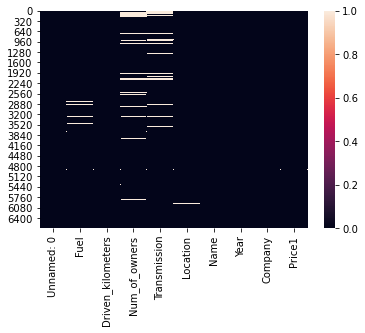

In [7]:
#heatmap also shows that there are missing value
sns.heatmap(ds.isnull())

In [8]:
#creating dataframe 
df=pd.DataFrame(ds)

In [9]:
#select only those rows which don't have missing values in target variable i.e price
df=df[df['Price1'].notna()]
df.head()

,Unnamed: 0,Fuel,Driven_kilometers,Num_of_owners,Transmission,Location,Name,Year,Company,Price1
0,0,Petrol,23 km,1st Owner,NaN,DL-4C,Maruti OMNI E,2014,Maruti,"2,00,199"
1,1,Petrol,"12,535 km",1st Owner,MANUAL,DL-12,Maruti Alto 800,2014,Maruti,"3,21,599"
2,2,Petrol,"2,589 km",1st Owner,NaN,UP-32,Hyundai VENUE S,2021,Hyundai,"8,08,699"
3,3,Petrol,"40,184 km",1st Owner,MANUAL,DL-8C,Maruti Alto K10,2013,Maruti,"2,42,299"
4,4,Petrol,"9,217 km",1st Owner,MANUAL,DL-8C,Maruti Alto 800,2015,Maruti,"2,76,199"


In [10]:
#again check shape of data set
df.shape

(6692, 10)

Now data set have  6692rows and 10 columns

In [11]:
#now price column don't have missing values
df.isnull().sum()

Unnamed: 0             0
Fuel                  86
Driven_kilometers      1
Num_of_owners        591
Transmission         563
Location               8
Name                   0
Year                   0
Company                0
Price1                 0
dtype: int64

<AxesSubplot:>

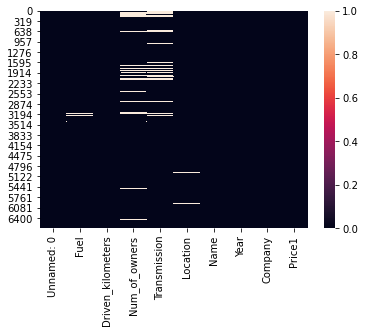

In [12]:
sns.heatmap(df.isnull())

# Visualazation

In [13]:
#Comany column
df['Company'].value_counts()

Maruti           2540
Hyundai          1200
Toyota            475
Honda             430
Mahindra          401
Ford              295
Tata              255
Renault           187
Volkswagen        171
Chevrolet         127
Skoda              93
Mercedes-Benz      79
Audi               73
Bmw                59
Nissan             53
Datsun             33
Other              22
Jeep               20
Fiat               18
Bajaj              16
Land               15
Force              14
Mercedes           13
Kia                12
Mitsubishi         12
Jaguar             10
Volvo               9
Mg                  9
Porsche             8
Mini                8
KIA                 7
BMW                 7
Ashok               4
Ambassador          4
MG                  3
Lamborghini         2
Isuzu               2
Ssangyong           2
Dc                  1
HYUNDAI             1
ISUZU               1
Eicher              1
Name: Company, dtype: int64

above counting shows that comapny  column have different values

In [14]:
df['Name'].value_counts()

Maruti Suzuki          1364
Maruti Swift Dzire      154
Maruti Swift VDI        145
Toyota Innova           134
Honda City              116
                       ... 
Skoda Yeti AMBITION       1
Audi A4 35                1
Jeep Others               1
Renault TRIBER RXZ        1
Nissan MAGNITE XV         1
Name: Name, Length: 507, dtype: int64

above counting of name column shows different model_names of the car

DIESEL           2102
PETROL           1863
Petrol           1309
Diesel           1076
CNG & HYBRIDS     119
Petrol + CNG       75
LPG                31
CNG                26
ELECTRIC            5
Name: Fuel, dtype: int64


<AxesSubplot:xlabel='Fuel', ylabel='count'>

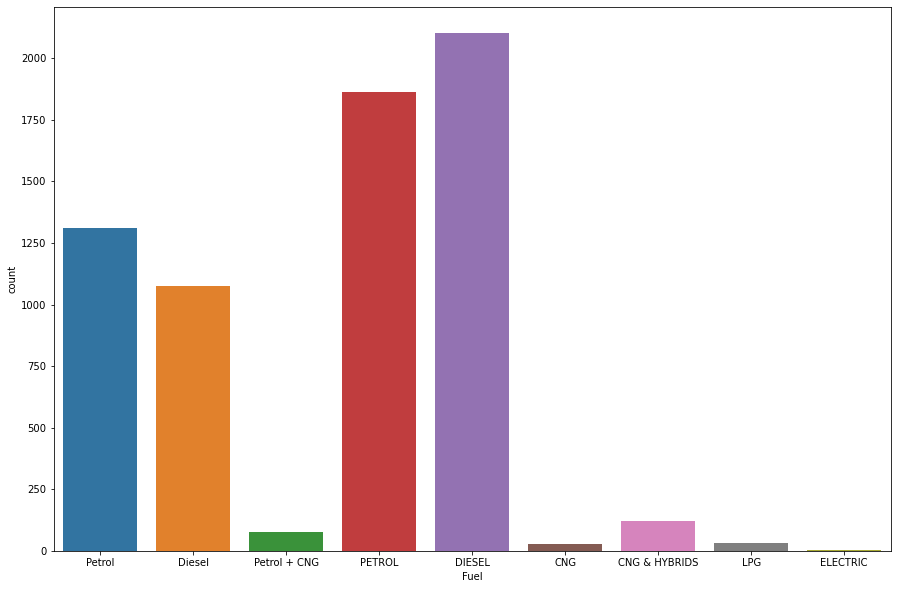

In [15]:
print(df['Fuel'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['Fuel'])

Aove countplot of fuel shows different values of fuel and their counting.

1st          2317
1st Owner    1663
2nd          1083
2nd Owner     368
3rd           262
First         158
Second         75
3rd Owner      53
4th            52
Third          31
4+             28
4th Owner       6
Fourth          5
Name: Num_of_owners, dtype: int64


<AxesSubplot:xlabel='Num_of_owners', ylabel='count'>

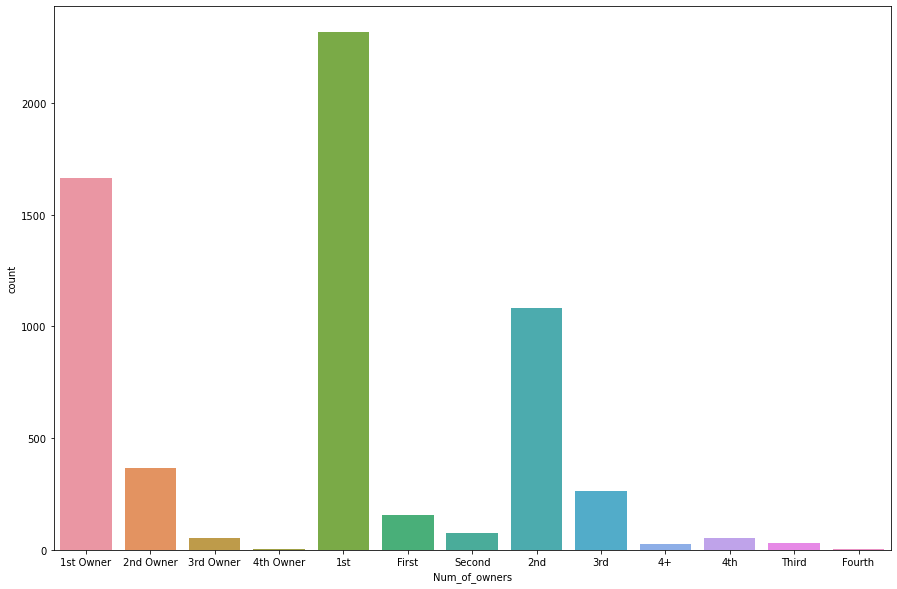

In [16]:
print(df['Num_of_owners'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['Num_of_owners'])

Above countplot shows different values of num_of_owners column

In [17]:
df['Driven_kilometers'].value_counts()

90,000 KM     51
100,000 KM    49
68000.0 KM    42
65000.0 KM    41
70000.0 KM    39
              ..
22,790 km      1
30471.0 KM     1
23,580 km      1
64,833 km      1
26,640 km      1
Name: Driven_kilometers, Length: 3923, dtype: int64

MANUAL       5184
AUTOMATIC     945
Name: Transmission, dtype: int64


<AxesSubplot:xlabel='Transmission', ylabel='count'>

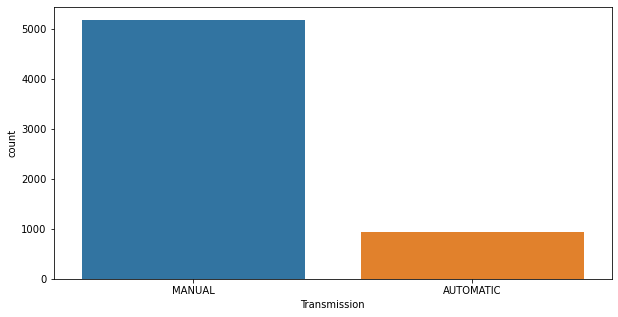

In [18]:
print(df['Transmission'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['Transmission'])

Above countplot shows that how many cars have manual transmission or automatic transmission

In [19]:
#location of car
df['Location'].value_counts()

DL-8C                        279
HR-26                        227
DL-3C                        210
DL-9C                        162
DL-2C                        132
                            ... 
Swargate, Pune                 1
Choori, Kasaragod              1
Kukshi                         1
Devi Mandir Area, Panipat      1
Chakkanthara, Palakkad         1
Name: Location, Length: 1970, dtype: int64

In [20]:
#year column gives info about when car is purchased
df['Year'].value_counts()

2016)      431
2012)      379
2017)      356
2015)      348
2013)      344
2014)      343
2018)      341
2015       324
2013       308
2011)      304
2014       297
2017       277
2018       251
2016       248
2019)      235
2010)      234
2012       230
2009)      172
2008)      158
2019       158
2007)      125
2020        96
2020)       95
2010        94
2006)       88
2011        87
2021)       57
2009        51
2005)       43
2004)       34
2003)       31
2008        24
2001)       22
2002)       22
2000)       17
1999)       10
2021         9
1995)        7
1997)        7
1998)        7
2007         6
1996)        4
1987)        3
1989)        2
2014.0)      2
1994)        2
1990)        1
2012.0)      1
1982)        1
1966)        1
1984)        1
2020.0)      1
1958)        1
2013.0)      1
1991)        1
Name: Year, dtype: int64

In [21]:
df['Price1'].value_counts()

 4,50,000    68
 2,50,000    57
 6,50,000    55
 1,50,000    47
 3,25,000    45
             ..
7,61,399      1
4,03,000      1
4,78,699      1
8,86,499      1
5,23,699      1
Name: Price1, Length: 2706, dtype: int64

# Preprocessing on data

In [22]:
df['Price1']=df['Price1'].str.replace(",",'')
df['Price1']=df['Price1'].astype(int)
df['Price1']

0        200199
1        321599
2        808699
3        242299
4        276199
         ...   
6707    4500000
6708     899000
6709     190000
6710    1799000
6711    1850000
Name: Price1, Length: 6692, dtype: int32

as the price values should be numeric type but in data set it is of object type, so we need to convert it into numeric form.
First replace comma(,) by bank space  and then convert it into numeric format(int)

In [23]:
df['Driven_kilometers']=df['Driven_kilometers'].str.split(" ").str.get(0).str.replace(",",'')
df['Driven_kilometers']=df['Driven_kilometers'].str.split(".").str.get(0)
df['Driven_kilometers']=df['Driven_kilometers'].fillna(0)
df['Driven_kilometers']=df['Driven_kilometers'].astype(int)
df['Driven_kilometers']

0          23
1       12535
2        2589
3       40184
4        9217
        ...  
6707    30000
6708    61000
6709    79000
6710    28000
6711    35000
Name: Driven_kilometers, Length: 6692, dtype: int32

Driven_kilometer column gives info about how many kilometers car has been driven, so it should be in numeric format, so let's change this column to numeric
First split values and replace special characters and commas and then convert it into numeric type

In [24]:
df['Year']=df['Year'].str.replace(")",'')
df['Year']=df['Year'].str.replace(".",'')
df['Year']=df['Year'].astype(int)
df['Total_years']=2021-df['Year']
df.drop("Year",axis=1,inplace=True)
df['Total_years']

0        7
1        7
2        0
3        8
4        6
        ..
6707     7
6708    12
6709     9
6710     5
6711     5
Name: Total_years, Length: 6692, dtype: int32

In year column, some signs are present so replaced that with blank space and convert it into nueric data.
Then create new column Total-years from year column which represent total years of car

In [25]:
df['Num_of_owners']=df['Num_of_owners'].replace('1st',1)
df['Num_of_owners']=df['Num_of_owners'].replace('1st Owner',1)
df['Num_of_owners']=df['Num_of_owners'].replace('First',1)
df['Num_of_owners']=df['Num_of_owners'].replace('2nd',2)
df['Num_of_owners']=df['Num_of_owners'].replace('2nd Owner',2)
df['Num_of_owners']=df['Num_of_owners'].replace('Second',2)
df['Num_of_owners']=df['Num_of_owners'].replace('3rd',3)
df['Num_of_owners']=df['Num_of_owners'].replace('3rd Owner',3)
df['Num_of_owners']=df['Num_of_owners'].replace('Third',3)
df['Num_of_owners']=df['Num_of_owners'].replace('4th',4)
df['Num_of_owners']=df['Num_of_owners'].replace('4+',5)
df['Num_of_owners']=df['Num_of_owners'].replace('4th Owner',4)
df['Num_of_owners']=df['Num_of_owners'].replace('Fourth',4)


NUm_of_owners tells how many peoples used car so convert this column into numeric type.
map values  1st,1st Owner,First to 1
map values 2nd,2nd Owner,Second, to 2
map values  3rd,3rd Owner,Third to 3
map values 4th,'4th Owner,Fourth to 4
map values 4+ to 5

In [26]:
#filling muissing values
df['Num_of_owners']=df['Num_of_owners'].fillna(0)

In [27]:
#conevrt num_of_column to int
df['Num_of_owners']=df['Num_of_owners'].astype(int)
df['Num_of_owners']

0       1
1       1
2       1
3       1
4       1
       ..
6707    3
6708    2
6709    1
6710    2
6711    1
Name: Num_of_owners, Length: 6692, dtype: int32

In [28]:
#filling missing values
df['Fuel']=df['Fuel'].fillna(df['Fuel'].mode()[0])
df['Transmission']=df['Transmission'].fillna("no_info")
df['Location']=df['Location'].fillna("no_info")

In [29]:
#now data set have no missing values
df.isnull().sum()

Unnamed: 0           0
Fuel                 0
Driven_kilometers    0
Num_of_owners        0
Transmission         0
Location             0
Name                 0
Company              0
Price1               0
Total_years          0
dtype: int64

<AxesSubplot:>

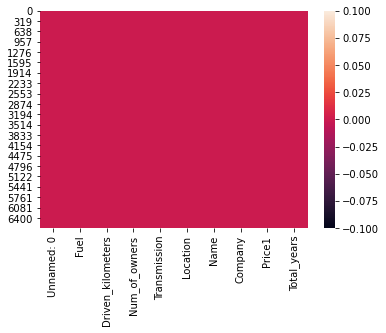

In [30]:
sns.heatmap(df.isnull())

In [31]:
#stastical summary
df.describe()

,Unnamed: 0,Driven_kilometers,Num_of_owners,Price1,Total_years
count,6692.000000,6692.000000,6692.000000,6.692000e+03,6692.000000
mean,3352.645846,67782.511955,1.288105,5.884777e+05,-6.377316
std,1939.191426,58408.572353,0.769363,9.602317e+05,495.499316
min,0.000000,0.000000,0.000000,1.500000e+04,-18179.000000
25%,1672.750000,37000.000000,1.000000,2.650000e+05,4.000000
50%,3349.500000,61866.000000,1.000000,4.097990e+05,7.000000
75%,5035.250000,86554.250000,2.000000,6.423990e+05,9.000000
max,6711.000000,999999.000000,5.000000,5.000000e+07,63.000000


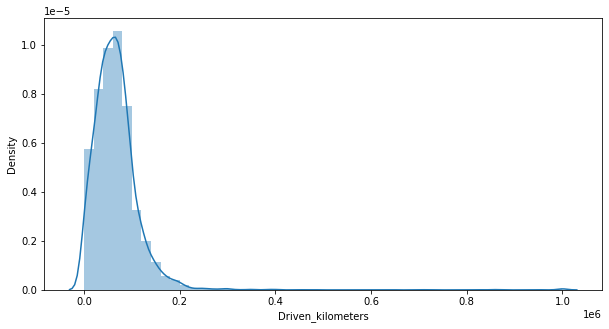

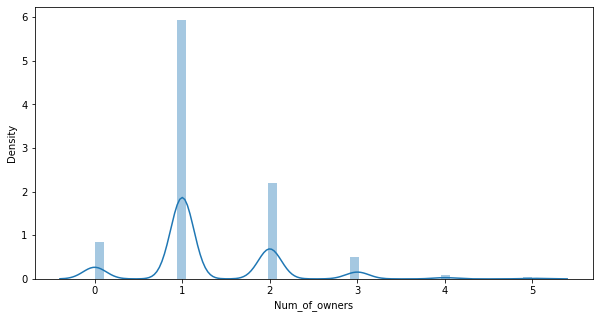

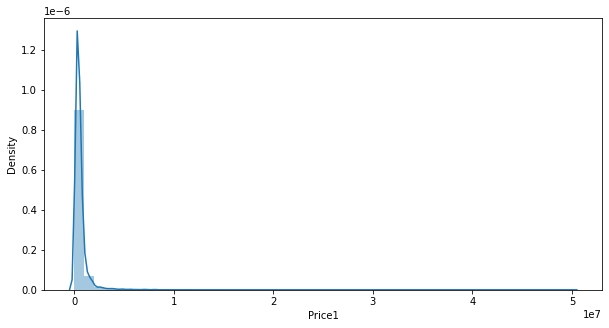

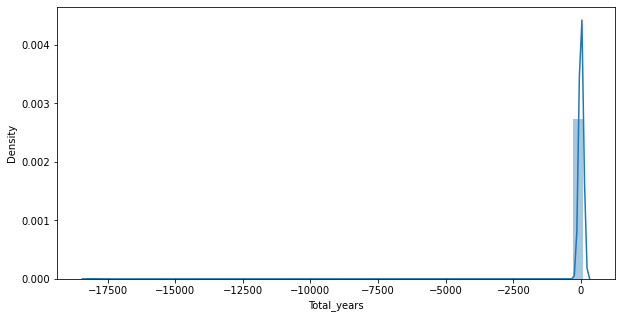

In [32]:
#displot
ncols=['Driven_kilometers','Num_of_owners','Price1','Total_years']
for i in df[ncols]:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])


Above distplot shows distribution of data

# Encoding

In [33]:
#encoding some column using get_dummies method of one hot encoder
dummies=pd.get_dummies(df[['Fuel','Transmission','Company']])
dummies.head()

,Fuel_CNG,Fuel_CNG & HYBRIDS,Fuel_DIESEL,Fuel_Diesel,Fuel_ELECTRIC,Fuel_LPG,Fuel_PETROL,Fuel_Petrol,Fuel_Petrol + CNG,Transmission_AUTOMATIC,...,Company_Nissan,Company_Other,Company_Porsche,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#name column is encoded using label encoder
le=LabelEncoder()

df['Name']=le.fit_transform(df['Name'])

In [35]:
#dropped columns and concat dummies column into data set
df.drop(['Fuel','Transmission','Company'],axis=1,inplace=True)

In [36]:
df2=pd.concat([df,dummies],axis=1)

In [37]:
df2.head()

,Unnamed: 0,Driven_kilometers,Num_of_owners,Location,Name,Price1,Total_years,Fuel_CNG,Fuel_CNG & HYBRIDS,Fuel_DIESEL,...,Company_Nissan,Company_Other,Company_Porsche,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,23,1,DL-4C,301,200199,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,12535,1,DL-12,259,321599,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2589,1,UP-32,160,808699,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,40184,1,DL-8C,260,242299,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9217,1,DL-8C,259,276199,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#dropped unnecessary columns
df2.drop("Location",axis=1,inplace=True)

In [39]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [40]:
#sepearate target variable
x=df2.drop(["Price1"],axis=1)
y=df2['Price1']

In [41]:
#standard scaler
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
cols=['Driven_kilometers','Name']
x[cols]=st.fit_transform(x[cols])


In [42]:
x_1=pd.DataFrame(x,columns=x.columns)

In [43]:
x_1.head()

,Driven_kilometers,Num_of_owners,Name,Total_years,Fuel_CNG,Fuel_CNG & HYBRIDS,Fuel_DIESEL,Fuel_Diesel,Fuel_ELECTRIC,Fuel_LPG,...,Company_Nissan,Company_Other,Company_Porsche,Company_Renault,Company_Skoda,Company_Ssangyong,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,-1.160182,1,0.331323,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.945951,1,-0.007760,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.116247,1,-0.807026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.472543,1,0.000314,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.002762,1,-0.007760,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
# split training data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_1,y,test_size=.25,random_state=219)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (5019, 58)
x_test shape (1673, 58)
y_train shape (5019,)
y_test shape (1673,)


In [68]:
#create instace of regression algorithm
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rf=RandomForestRegressor()
svr=SVR()
l1=Lasso(alpha=0.001)
r1=Ridge(alpha=0.001)


In [69]:
#fit data  and predict 
list1=[lr,dtr,rf,svr,l1,r1]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores",i)
    print("r2_score",r2_score(y_test,pred))
    print("mean_squared_error",mean_squared_error(y_test,pred))
    print("mean_absolute_error",mean_absolute_error(y_test,pred))
    

accuracy_scores LinearRegression()
r2_score 0.4674687461890442
mean_squared_error 231764108396.26334
mean_absolute_error 258732.22603485011
accuracy_scores DecisionTreeRegressor()
r2_score 0.7012651817148703
mean_squared_error 130013043011.65211
mean_absolute_error 147055.79796772264
accuracy_scores RandomForestRegressor()
r2_score 0.8553926996841921
mean_squared_error 62934863982.99051
mean_absolute_error 121308.64814888041
accuracy_scores SVR()
r2_score -0.05078857103084777
mean_squared_error 457316025181.87787
mean_absolute_error 310615.73047899746
accuracy_scores Lasso(alpha=0.001)
r2_score 0.4656743997152657
mean_squared_error 232545029905.88965
mean_absolute_error 258448.13751463423
accuracy_scores Ridge(alpha=0.001)
r2_score 0.4674724764481426
mean_squared_error 231762484941.9255
mean_absolute_error 258731.36615293552


Obsering above metrics we can conclude that RandomForestRegressor give hifg r2_score

# HyperParameterTunning

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor() 

from sklearn.model_selection import GridSearchCV
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [71]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 20}

In [72]:
rf1=RandomForestRegressor(bootstrap=False,max_features= 'sqrt',min_samples_split=4,n_estimators=20)
rf1.fit(x_train,y_train)
rpred=rf1.predict(x_test)
cv3=cross_val_score(rf1,x_train,y_train,cv=5)
print("score",cv3)
print("cross score mean value",cv3.mean())
print('mean squared error',mean_squared_error(rpred,y_test))
print(r2_score(y_test,rpred))

score [0.65477603 0.61695564 0.56479431 0.11027668 0.50882151]
cross score mean value 0.491124834827942
mean squared error 109943330852.28693
0.7473799535568422


After hyperparametertunnig r2_score of randomforestregressor didn't increase so we have to select above RandomForest model which gave r2_score high

In [73]:
#creating object file
import joblib

In [74]:
joblib.dump(rf,"car_prediction.obj")

['car_prediction.obj']

In [75]:
file1=joblib.load("car_prediction.obj")

In [76]:
file1.predict(x_test)

array([1704374.82,  383318.  , 1208429.99, ...,  357743.05,  386209.51,
        588725.  ])